In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



In [2]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 99% 648M/653M [00:03<00:00, 160MB/s]
100% 653M/653M [00:03<00:00, 184MB/s]


In [3]:
import zipfile

with zipfile.ZipFile('us-accidents.zip', 'r') as zip_ref:
    zip_ref.extractall('us-accidents')

In [4]:

file_path = '/content/us-accidents/US_Accidents_March23.csv'

In [5]:
import dask.dataframe as dd
dataset = dd.read_csv(file_path)

In [6]:
dataset.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
dataset.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
import dask.dataframe as dd
unique_states = dataset['State'].unique()
unique_states = unique_states.compute()

print("Unique states in the dataset:")
print(unique_states)



Unique states in the dataset:
0     OH
1     WV
2     CA
3     FL
4     GA
5     SC
6     NE
7     IA
8     IL
9     MO
10    WI
11    IN
12    MI
13    NJ
14    NY
15    CT
16    MA
17    RI
18    NH
19    PA
20    KY
21    MD
22    VA
23    DC
24    DE
25    TX
26    WA
27    OR
28    AL
29    NC
30    AZ
31    TN
32    LA
33    MN
34    CO
35    OK
36    NV
37    UT
38    KS
39    NM
40    AR
41    MS
42    ME
43    VT
44    WY
45    ID
46    ND
47    MT
48    SD
Name: State, dtype: string


In [14]:
pip install dask-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 6.0 MB/s eta 0:00:00


In [16]:
import dask.dataframe as dd
dataset = dd.read_csv(file_path)
pandas_dataset = dataset.compute()


In [17]:
# Count the occurrences of 'CA' in the "State" column
california_count = (pandas_dataset['State'] == 'CA').sum()
print(f"California (CA) occurred {california_count} times in the dataset.")


California (CA) occurred 1741433 times in the dataset.


In [18]:
ca_dataset = dataset[dataset['State'] == 'CA']
pandas_ca_dataset = ca_dataset.compute()
print("First few rows with 'CA' in the State column:")
print(pandas_ca_dataset.head())


First few rows with 'CA' in the State column:
        ID   Source  Severity           Start_Time             End_Time  \
728  A-729  Source2         3  2016-06-21 10:34:40  2016-06-21 11:04:40   
729  A-730  Source2         3  2016-06-21 10:30:16  2016-06-21 11:16:39   
730  A-731  Source2         2  2016-06-21 10:49:14  2016-06-21 11:19:14   
731  A-732  Source2         3  2016-06-21 10:41:42  2016-06-21 11:11:42   
732  A-733  Source2         2  2016-06-21 10:16:26  2016-06-21 11:04:16   

     Start_Lat   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
728  38.085300 -122.233017      NaN      NaN           0.0  ...      False   
729  37.631813 -122.084167      NaN      NaN           0.0  ...      False   
730  37.896564 -122.070717      NaN      NaN           0.0  ...      False   
731  37.334255 -122.032471      NaN      NaN           0.0  ...      False   
732  37.250729 -121.910713      NaN      NaN           0.0  ...      False   

    Station   Stop Traffic_Calming

In [19]:
pandas_ca_dataset.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
728,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
729,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
730,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
731,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
732,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [20]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Finding Severity Based on , Source', 'State', 'Weather_Condition', Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'

In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# features and target
features = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
target = 'Severity'

#categorical columns
cat_columns = ['Source', 'State', 'Weather_Condition']
for col in cat_columns:
    le = LabelEncoder()
    pandas_ca_dataset[col] = le.fit_transform(pandas_ca_dataset[col].astype(str))

# Spliting the  data into the features and target
X = pandas_ca_dataset[features]
y = pandas_ca_dataset[target]

#20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)
y_pred = rf_model.predict(X_test_imputed)

# Print the data,
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.32      0.46      2017
           2       0.93      0.97      0.95    289373
           3       0.81      0.64      0.72     54220
           4       0.75      0.30      0.43      2677

    accuracy                           0.91    348287
   macro avg       0.82      0.56      0.64    348287
weighted avg       0.91      0.91      0.91    348287



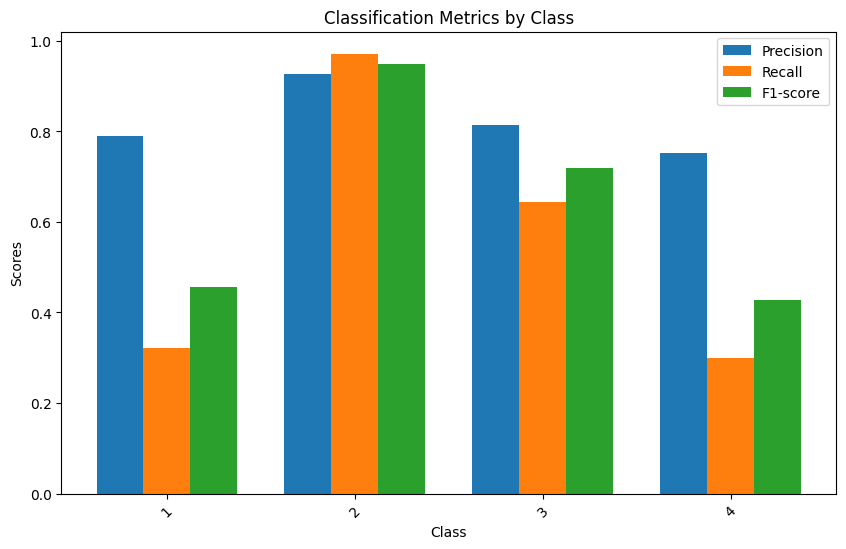

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
metrics = list(report.keys())[:-3]
classes = list(report.keys())[:-3]

# Initialize lists to store metric scores for each class
precision_scores = []
recall_scores = []
f1_scores = []
for cls in classes:
    precision_scores.append(report[cls]['precision'])
    recall_scores.append(report[cls]['recall'])
    f1_scores.append(report[cls]['f1-score'])

# Plot bar plots for precision, recall, and F1-score
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(classes))

bar1 = ax.bar(index, precision_scores, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1-score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.show()


In [23]:
# Get all unique values of Severity
unique_severity = pandas_ca_dataset['Severity'].unique()
print("Unique Severity Values:", unique_severity)


Unique Severity Values: [3 2 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

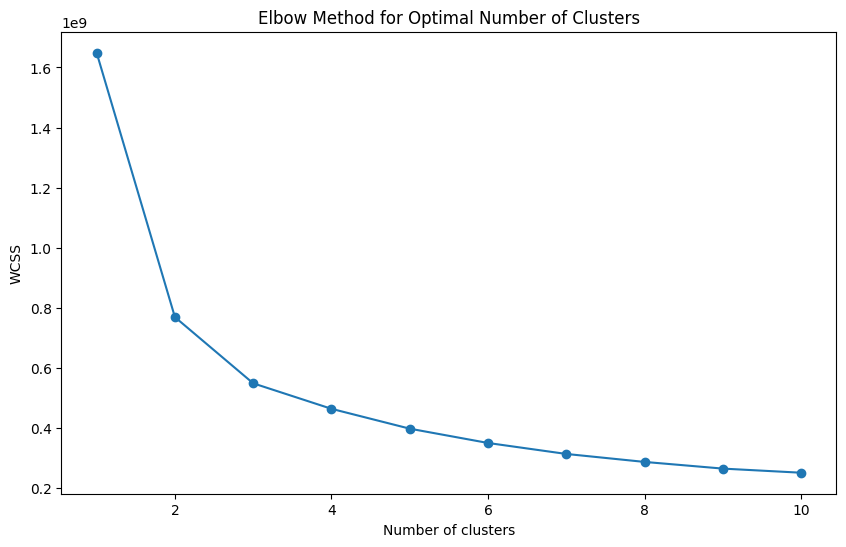

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


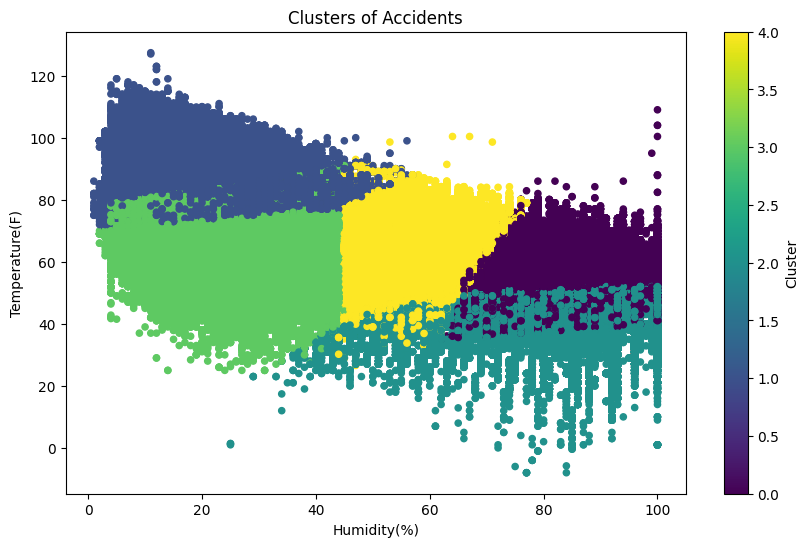

Cluster Severity Analysis:
Severity           1       2      3     4
Cluster_Labels                           
0               3103  356926  93165  3978
1               2093  196518  23460  1851
2               1084  201698  11520  1308
3                818  238105  44143  1856
4               3186  452586  99526  4509


In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

features_for_clustering = ['Severity','Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
X_clustering = pandas_ca_dataset[features_for_clustering]
imputer = SimpleImputer(strategy='mean')
X_clustering_imputed = imputer.fit_transform(X_clustering)
X_clustering_imputed = imputer.fit_transform(X_clustering)

wcss = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering_imputed)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_clustering_imputed)
pandas_ca_dataset['Cluster_Labels'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pandas_ca_dataset['Humidity(%)'], pandas_ca_dataset['Temperature(F)'], c=pandas_ca_dataset['Cluster_Labels'], cmap='viridis', s=20)
plt.xlabel('Humidity(%)')
plt.ylabel('Temperature(F)')
plt.title('Clusters of Accidents')
plt.colorbar(label='Cluster')
plt.show()

# Analyze the distribution of Severity within each cluster
cluster_severity_analysis = pandas_ca_dataset.groupby('Cluster_Labels')['Severity'].value_counts().unstack(fill_value=0)
print("Cluster Severity Analysis:")
print(cluster_severity_analysis)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


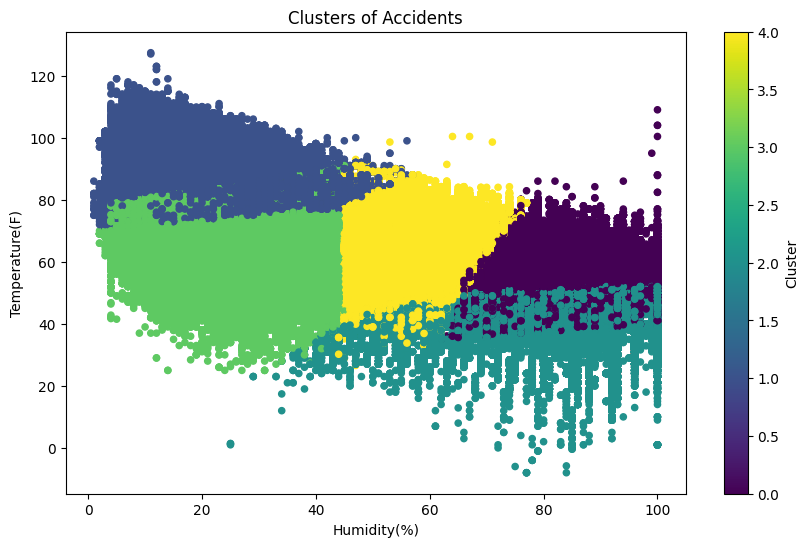

Cluster Severity Analysis:
Severity           1       2      3     4
Cluster_Labels                           
0               3103  356926  93165  3978
1               2093  196518  23460  1851
2               1084  201698  11520  1308
3                818  238105  44143  1856
4               3186  452586  99526  4509


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

features_for_clustering = ['Severity','Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
X_clustering = pandas_ca_dataset[features_for_clustering]
imputer = SimpleImputer(strategy='mean')

##From elbow method we can choose n=5
# Fit and transform the imputer on the features
X_clustering_imputed = imputer.fit_transform(X_clustering)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_clustering_imputed)
pandas_ca_dataset['Cluster_Labels'] = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(pandas_ca_dataset['Humidity(%)'], pandas_ca_dataset['Temperature(F)'], c=pandas_ca_dataset['Cluster_Labels'], cmap='viridis', s=20)
plt.xlabel('Humidity(%)')
plt.ylabel('Temperature(F)')
plt.title('Clusters of Accidents')
plt.colorbar(label='Cluster')
plt.show()

cluster_severity_analysis = pandas_ca_dataset.groupby('Cluster_Labels')['Severity'].value_counts().unstack(fill_value=0)
print("Cluster Severity Analysis:")
print(cluster_severity_analysis)


In [26]:
from sklearn.impute import SimpleImputer

# Step 3: Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


Severity                0
Distance(mi)            0
Temperature(F)      45969
Wind_Chill(F)      510965
Humidity(%)         48341
Visibility(mi)      40125
Wind_Speed(mph)    162891
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


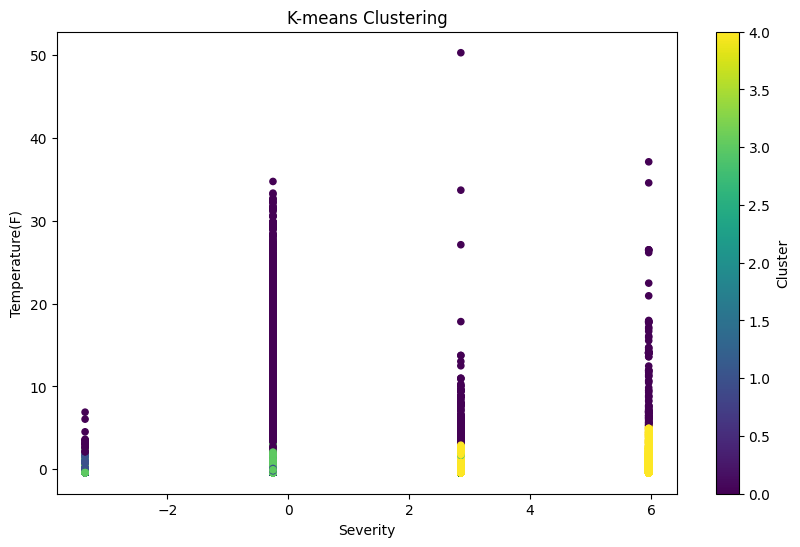

,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Cluster_Labels
Cluster,,,,,,,,,,,,,,,,,
0,0.014440,2.011916,35.076688,-119.024527,35.057610,-118.993657,6.952201,0.0,64.714481,64.406721,55.147770,29.459176,9.313315,6.196029,0.001479,17.885209,2.345648
1,0.208125,1.990974,35.847270,-119.715248,35.795776,-119.636522,0.398545,0.0,55.235603,54.804642,68.636982,29.578191,9.741369,4.484590,0.001160,19.335937,2.023452
2,0.214417,2.015458,36.068556,-119.769121,36.057241,-119.720963,0.439955,0.0,51.315620,50.424835,87.968761,29.432602,3.487514,5.104512,0.023462,24.442000,1.186582
3,0.176596,1.990648,35.566768,-119.321544,35.498812,-119.243006,0.474792,0.0,76.620225,76.618851,35.702734,29.429557,9.795702,8.469667,0.000099,17.412495,2.451708
4,0.985519,3.080881,35.256695,-119.279455,35.711867,-119.553389,0.161367,0.0,65.117880,64.903997,59.161312,29.606990,9.268317,6.072140,0.002549,20.145606,2.076908


In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


features = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
missing_values = pandas_ca_dataset[features].isnull().sum()
print(missing_values)
pandas_ca_dataset.dropna(subset=features, inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(pandas_ca_dataset[features])

#
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X)

#Predict Clusters
cluster_labels = kmeans.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=20)
plt.xlabel(features[0])
plt.ylabel(features[2])
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

#Analyze Clusters
numeric_columns = pandas_ca_dataset.select_dtypes(include=np.number).columns
cluster_analysis = pandas_ca_dataset[numeric_columns].copy()
cluster_analysis['Cluster'] = cluster_labels
cluster_analysis.groupby('Cluster').mean()



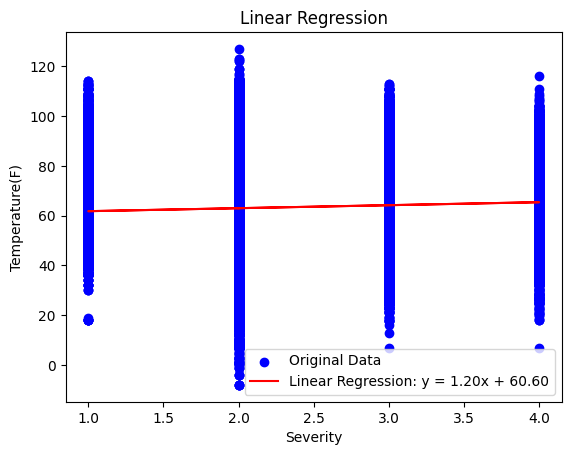

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x_var = pandas_ca_dataset['Severity']
y_var = pandas_ca_dataset['Temperature(F)']

X = x_var.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y_var)

m = model.coef_[0]
b = model.intercept_

y_pred = model.predict(X)

plt.scatter(x_var, y_var, color='blue', label='Original Data')
plt.plot(x_var, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')
plt.xlabel('Severity')
plt.ylabel('Temperature(F)')
plt.title('Linear Regression')
plt.legend()
plt.show()
